## Markov Chain Monte Carlo Simulation of the Ising Model with the Metropolis-Hasting's Algorithm

In [2]:
#libraries for mcmc
import numpy as np
import scipy 
import matplotlib.pyplot as plt

#libraries for gif generation - must pip install moviepy 
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

#libraries for interactive simulations - must conda install pillow
from PIL import Image
from ipywidgets import interact

%matplotlib inline

## (Important: Please do NOT run any of the code blocks. Some of the simulations can take up  to a day to run. All the results from the simulations are visible in the notebook.)


## 1-D Ising Model Simulation: Ferromagnetic coupling with no external magnetic field                                                            
  ##                              (Single example with fixed temperature)
  
We will first investigate the 1-D Ising Model as a warmup for a more rigorous analysis of the 2-D Ising Model. The results of this simulation are well known, and trivial, i.e there is no phase transition and the order parameter (magnetization) is zero at all non-zero temperatures. We will nevertheless present some graphics and visuals of this model and then make some measurements on important parameters.

In [17]:
J = 1 #coupling parameter
steps = 10000 #number of monte carlo steps
grid_size = 1000 #lattice size
grid = np.random.choice([-1,1], size=grid_size) #initialize lattice

def H(array):  #function to compute hamiltonian / energy of the lattice
    e = -np.sum(J * array * np.roll(array, 1) + J * array * np.roll(array, -1)) / 2 #divide by 2 to adjust for double counting of spin pairs
    return e

def M(array): #function to calculate magnetization of the lattice
    return np.sum(array)


def delta_E(array, x): #change in energy caused by single spin switch (only nearest neighbour interactions)
    return 2 * J * (array[x] * array[(x - 1) % grid_size] + array[x] * array[(x + 1) % grid_size])

def acceptance_probability(array,x,T): #acceptance ratio (symmetric proposal distribution on markov chain)
    return np.exp(-(delta_E(array, x)) / T)

def monte_carlo(array, T): #monte carlo step with metropolis-hastings algorithm
        index = np.random.randint(grid_size) #pick a random spin site
        random = np.random.rand() #generate random number for acceptance test
        if delta_E(array, index) < 0: # flip spin and accept new configuration if change in energy is negative
            array[index] *= -1
        elif random < acceptance_probability(array, index, T): #or accept with probability in accordance with acceptance criterion
            array[index] *= -1
        return array

def image_convert(array):
    image_xvalues = [] #manipulate 1-D array into an equivalent 2-D array to display as image (stretch along x and y axis)
    for element in array:
        for n in range(60):
            image_xvalues.append(element)
    converted = np.array([image_xvalues] * 5000)
    return converted

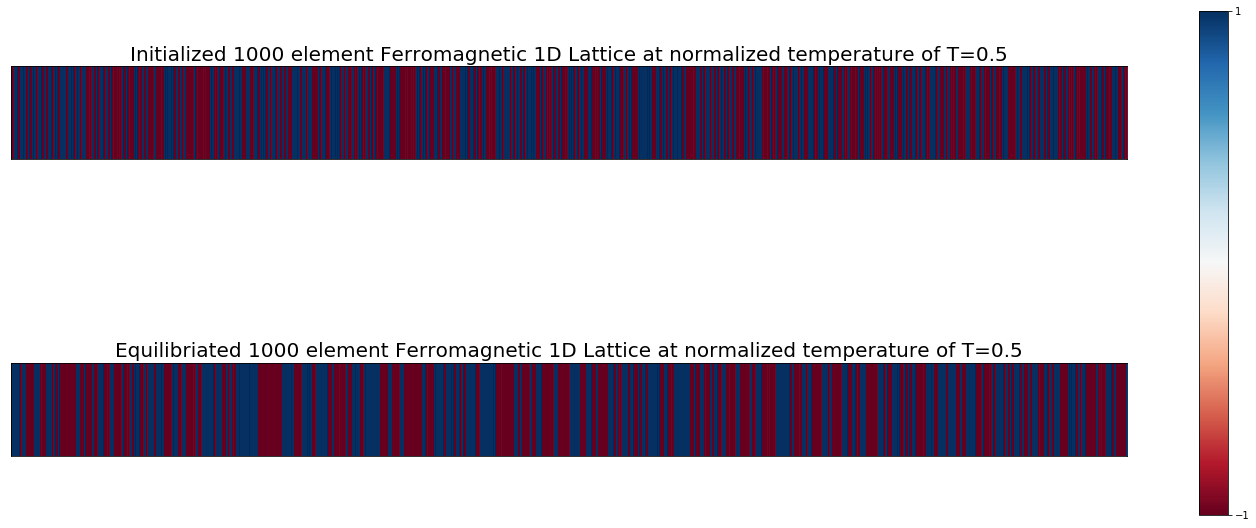

			Average energy over evolution of the system: -0.463293526
			Average magnetization: 9.4893e-05


In [18]:
initial_image = image_convert(grid)


for step in range(steps): 
    for trial in range(grid_size): #run monte carlo process till equilibriation
        monte_carlo(grid, 0.5)

        
E = 0
Mag = 0

for step in range(2000):
    for trial in range(grid_size): #run monte carlo process for 2000 iterations after equilibriation to calculate average parameters
        eq = monte_carlo(grid, 2)
        E += H(eq)
        Mag += M(eq)
    
H_average = E / (2000 * grid_size * grid_size) #average energy per site over the evolution of the system
M_average = Mag / (2000 * grid_size * grid_size) #average magnetization per site over the evolution of the system (order parameter)

eq_image = image_convert(eq)

fig = plt.figure(figsize=(20,10)) #display stuff. Every 'band' in the image is a spin site.
ax = fig.add_subplot(212) 
ax2 = fig.add_subplot(211)
cax2 = ax2.imshow(initial_image, cmap=plt.cm.RdBu)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False) 
ax2.tick_params(bottom=False, left=False)
ax2.set_title('Initialized 1000 element Ferromagnetic 1D Lattice at normalized temperature of T=0.5', size=20)
ax.set_title('Equilibriated 1000 element Ferromagnetic 1D Lattice at normalized temperature of T=0.5', size=20)
cax=ax.imshow(eq_image,cmap=plt.cm.RdBu)
plt.setp(ax.get_yticklabels(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)   
ax.tick_params(bottom=False, left=False)
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
fig.colorbar(cax, cax=cbar_ax, ticks=[-1,1])
plt.show()

print('\t\t\tAverage energy over evolution of the system: {}'.format(H_average))
print('\t\t\tAverage magnetization: {}'.format(M_average))

Note that there is no change in order in the system.

## 2) Temperature dependent evolution of the 1-D Ising Model

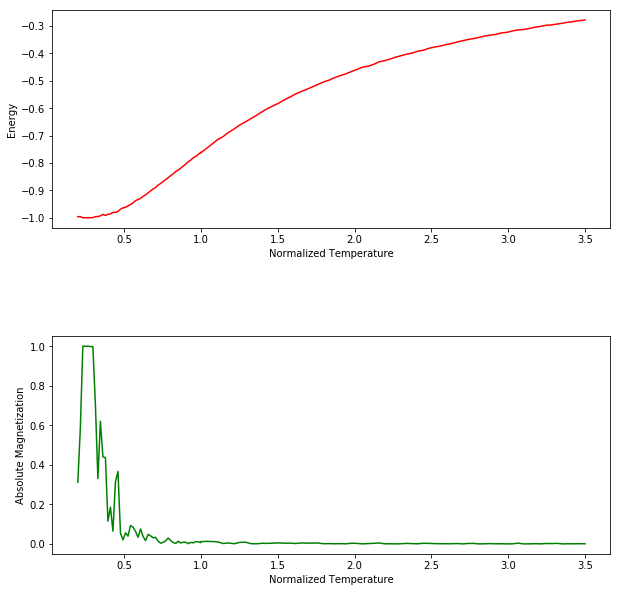

In [19]:
temps = np.linspace(0.2, 1, 50) #generate an array of various normalized temperatures
temps2 = np.linspace(1, 3.5, 70)
temp_list = np.hstack((temps, temps2))

steps = 10000
grid_size = 1000 

E_array = [] #store average energies and magnetizations at various temperatures
M_array = []

for temp in temps: #iterate over temperatures
    E = 0
    Mag = 0
    
    for step in range(steps * 2): #run monte carlo process till equilibriation
        for trial in range(grid_size):
            monte_carlo(grid, temp)
            

    for step in range(6000):
        for trial in range(grid_size): #run monte carlo process after equilibriation to calculate average parameters
            eq = monte_carlo(grid, temp)
        E += H(eq)
        Mag += M(eq)
    E_array.append(E / (6000 * grid_size)) #store parameters
    M_array.append(np.abs(Mag / (6000 * grid_size)))

for temp1 in temps2: #iterate over temperatures
    E1 = 0
    Mag1 = 0
    for step in range(steps):
        for trial in range(grid_size):
            monte_carlo(grid, temp1)
        
    for step in range(2000): 
        for trial in range(grid_size):#run monte carlo process for 2000 iterations after equilibriation to calculate average parameters
            eq = monte_carlo(grid, temp1)
        E1 += H(eq)
        Mag1 += M(eq)
    E_array.append(E1 / (2000 * grid_size)) #store parameters
    M_array.append(np.abs(Mag1 / (2000 * grid_size)))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10)) #display stuff
plt.subplots_adjust(hspace=0.5)
ax1.set_xlabel('Normalized Temperature')
ax1.set_ylabel('Energy')
ax1.plot(temp_list, E_array,'r-')
ax2.set_xlabel('Normalized Temperature')
ax2.set_ylabel('Absolute Magnetization')
ax2.plot(temp_list, M_array, 'g-')
plt.show()   

The above results are largely consistent with theory: the magnetization is zero for most temperatures. However, we can 
see a 'smeared out' phase transition at low temperatures. This is caused by finite size effects and critical slowdown. 
An infinite array would not present the same anomalies. Critical slowdown causes the autocorrelation time to diverge exponentially, causing samples to be more correlated over longer periods of monte-carlo time near the critical temperature, and hence the model will require sparser sampling (and more samples) for temperatures around the critical temperature. We do not have the computational power to run larger arrays for many equlibration and sampling cycles (this simulation already runs 6000 sweeps of the lattice after equilibriating with 10000 sweeps for each temperature point), neither is it worth anyone's time, since this simulation demonstrates a trivial result with no interesting physical insights (the critical temperature is known to be 0). We will account for critical slowdown with some rigor by using autocorrelation functions when dealing with the 2-D Ising Model.

## 2-D Ising Model

We will now investigate the two dimensional ising model. The lattice will not need to be nearly as large as the 1-D case as finite size effects are not as pernicious to the validity of the physical results since we do expect a phase transition. We will therefore use a 30 X 30 lattice.

In [4]:
J=1 #coupling parameter
def H(array):  #function to compute hamiltonian / energy of the lattice
    e=-np.sum(J*array*np.roll(array,1,axis=0)+J*array*np.roll(array,-1,axis=0)+J*array*np.roll(array,1,axis=1)+J*array*np.roll(array,-1,axis=1))/2 #divide by 2 to adjust for double counting of spin pairs
    return e

def M(array): #function to calculate magnetization of the lattice
    return np.sum(array)


def delta_E(array,x,y): #change in energy caused by single spin switch (only nearest neighbour interactions)
    return 2*J*(array[x,y]*array[(x-1)%grid_size,y]+array[x,y]*array[(x+1)%grid_size,y]+array[x,y]*array[x,(y+1)%grid_size]+array[x,y]*array[x,(y-1)%grid_size])

def acceptance_probability(array,x,y,T): #acceptance ratio (symmetric proposal distribution on markov chain)
    return np.exp(-(delta_E(array,x,y))/T)

def monte_carlo(array,T): #monte carlo step with metropolis-hastings algorithm
        x_index=np.random.randint(grid_size)
        y_index=np.random.randint(grid_size) #pick a random spin site
        random=np.random.random() #generate random number for acceptance test
        if delta_E(array,x_index,y_index)<0: # flip spin and accept new configuration if change in energy is negative
            array[x_index,y_index]*=-1
        elif random<acceptance_probability(array,x_index,y_index,T): #or accept with probability in accordance with acceptance criterion
            array[x_index,y_index]*=-1
        return array



## Rigorous autocorrelation analysis 

Before performing measurements on the 2-D Ising model, we will calculate two estimates for the autocorrelation time, first for temperatures near the critical temperature as derived analytically from theory, and then for a temperature that is further away from the postulated critical temperature. We will then use these to draw roughly uncorrelated samples from the model to attain accurate ensemble averages of the parameters of interest at various temperatures.

The autocorrelation function $\chi(t)$ used here for some time series variable 'm' is: 
\begin{equation} 
\chi (t) = \frac{1}{t_{max}-t} \sum_{t' = 0}^{t_{max}-t-1} m(t')m(t'+t)-\frac{1}{t_{max}-t}\sum_{t' =0}^{t_{max}-t-1} m(t') \cdot \frac{1}{t_{max}-t} \sum_{t' =0}^{t_{max}-t-1} m(t'+t)
\end{equation}

From: 'Monte Carlo Methods in Statistical Physics', M. E. J. Newman and G. T. Barkema (Oxford University Press, Oxford, 1999)

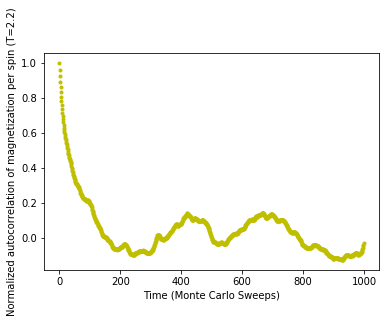

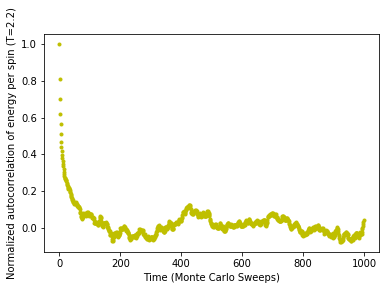

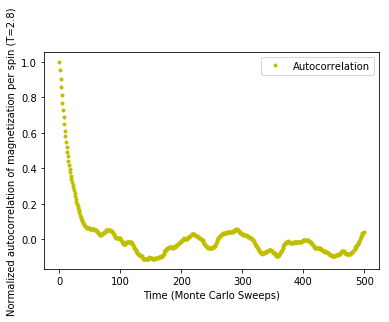

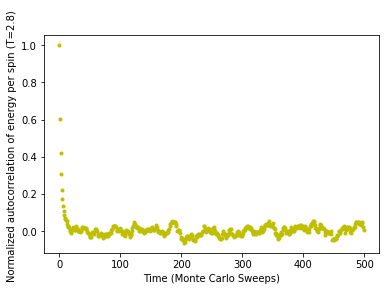

In [32]:
def autocorrelation(time,L,param): #time: number of monte carlo steps
    square_sum=0                   # L : Interval of ensemble averaging, i.e number of monte carlo steps being averaged over
    sum1=0                         #param: observable being averaged (magnetization, energy, etc.)
    sum2=0
    for j in range (L-time):
        square_sum+=param[j]*param[j+time]
        sum1+=param[j]
        sum2+=param[j+time]
    scaling=1/(L-time)
    return scaling*square_sum-scaling*sum1*scaling*sum2



mag_array=[]
E_array=[]
grid_size=30
grid=np.random.choice([-1,1],size=(grid_size,grid_size))

for i in range(10000): #for T=2.2
    for j in range(grid_size*grid_size):
        eq=monte_carlo(grid,2.2)
    if i>=5000:
        mag=M(eq)
        E=H(eq)
        mag_array.append(mag)
        E_array.append(E)
        
            
t=np.arange(0,1000)
autoCmag=[autocorrelation(i,5000,mag_array)/autocorrelation(0,5000,mag_array)  for i in t]
autoCE=[autocorrelation(i,5000,E_array)/autocorrelation(0,5000,E_array)for i in t] 


plt.figure()
plt.plot(t,autoCmag,'y.',label='Autocorrelation')
plt.xlabel('Time (Monte Carlo Sweeps)')
plt.ylabel('Normalized autocorrelation of magnetization per spin (T=2.2)')
plt.show()

plt.figure()
plt.plot(t,autoCE,'y.',label='Autocorrelation')
plt.xlabel('Time (Monte Carlo Sweeps)')
plt.ylabel('Normalized autocorrelation of energy per spin (T=2.2)')
plt.show()


mag_array2=[]
E_array2=[]
grid=np.random.choice([-1,1],size=(grid_size,grid_size))
for i in range(7000): #For T=2.8
    for j in range(grid_size*grid_size):
        eq2=monte_carlo(grid,2.8)
    if i>=2000:
        mag2=M(eq2)
        E2=H(eq2)
        mag_array2.append(mag2)
        E_array2.append(E2)

t2=np.arange(0,500)
autoCmag2=[autocorrelation(i,5000,mag_array2) / autocorrelation(0,5000,mag_array2)  for i in t2]
autoCE2=[autocorrelation(i,5000,E_array2)/ autocorrelation(0,5000,E_array2) for i in t2]

plt.figure()
plt.plot(t2,autoCmag2,'y.',label='Autocorrelation')
plt.xlabel('Time (Monte Carlo Sweeps)')
plt.ylabel('Normalized autocorrelation of magnetization per spin (T=2.8)')
plt.legend()
plt.show()

plt.figure()
plt.plot(t2,autoCE2,'y.',label='Autocorrelation')
plt.xlabel('Time (Monte Carlo Sweeps)')
plt.ylabel('Normalized autocorrelation of energy per spin (T=2.8) ')
plt.show()


We will discard the autocorrelations for t>200 for temperature T=2.2 and discard the autocorrelations for t>100 for T=2.8, thus keeping the exponential portions of all the data and disregarding the noise. We will then fit these autocorrelations to an exponential to extract estimates for the autocorrelation time.

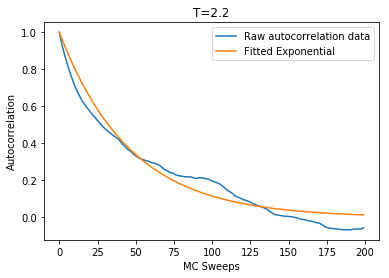

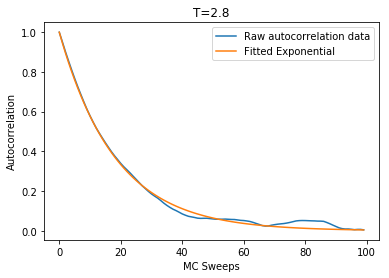

Autocorrelation time for Magnetization at T=2.2 = 46
Autocorrelation time for Magnetization at T=2.8 = 18


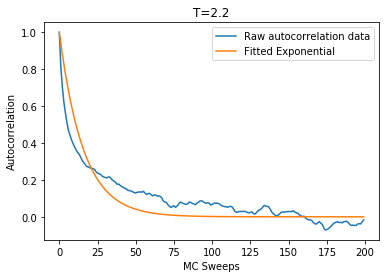

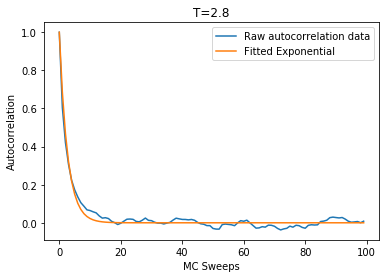

Autocorrelation time for Energy at T=2.2 = 15
Autocorrelation time for Energy T=2.8 = 2


In [34]:
autoCmag=autoCmag[:200]
autoCmag2=autoCmag2[:100]
autoCE=autoCE[:200]
autoCE2=autoCE2[:100]

from scipy.optimize import curve_fit

def fit_func(t,T): #fit autocorrelations to exponential
    return np.exp(-t/T)

par1,cov1=curve_fit(fit_func,np.arange(0,200),autoCmag,50)
par2,cov2=curve_fit(fit_func,np.arange(0,100),autoCmag2,100)

x=np.arange(0,200)

plt.figure()
plt.plot(x,autoCmag,x,fit_func(x,par1))
plt.xlabel('MC Sweeps')
plt.ylabel('Autocorrelation')
plt.legend(['Raw autocorrelation data','Fitted Exponential'])
plt.title('T=2.2')
plt.show()

x2=np.arange(0,100)

plt.figure()
plt.plot(x2,autoCmag2,x2,fit_func(x2,par2))
plt.xlabel('MC Sweeps')
plt.ylabel('Autocorrelation')
plt.legend(['Raw autocorrelation data','Fitted Exponential'])
plt.title('T=2.8')
plt.show()

print('Autocorrelation time for Magnetization at T=2.2 = {}'.format(int(par1)))
print('Autocorrelation time for Magnetization at T=2.8 = {}'.format(int(par2)))

par3,cov3=curve_fit(fit_func,np.arange(0,200),autoCE,25)
par4,cov4=curve_fit(fit_func,np.arange(0,100),autoCE2,100)

plt.figure()
plt.plot(x,autoCE,x,fit_func(x,par3))
plt.xlabel('MC Sweeps')
plt.ylabel('Autocorrelation')
plt.legend(['Raw autocorrelation data','Fitted Exponential'])
plt.title('T=2.2')
plt.show()

plt.figure()
plt.plot(x2,autoCE2,x2,fit_func(x2,par4))
plt.xlabel('MC Sweeps')
plt.ylabel('Autocorrelation')
plt.legend(['Raw autocorrelation data','Fitted Exponential'])
plt.title('T=2.8')
plt.show()

print('Autocorrelation time for Energy at T=2.2 = {}'.format(int(par3)))
print('Autocorrelation time for Energy T=2.8 = {}'.format(int(par4)))

Now that we have estimated the autocorrelation times of the magnetization for two temperatures (one of which is very close to the critical temperature), we will sample about every 2T monte carlo steps to attain roughly uncorrelated samples. 

## Simulating the 2D Ising Model

Expression for error on measurables $m$:
\begin{equation}
\sqrt{\frac{1+2\tau / \Delta t}{n-1} \cdot (\overline{m^2}-\overline{m}^2)}
\end{equation}

Where $\tau$ is the autocorrelation time and $\Delta t$ is the sampling interval.

In [35]:
grid_size=30
temps1=[2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0]
temps2=[0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4]
mag_array=[]
E_array=[]
mag_array2=[]
E_array2=[]
C_array=[]
X_array=[]
C_array2=[]
X_array2=[]
m_error=[]
E_error=[]
m_error2=[]
E_error2=[]
frames=np.array([np.zeros([grid_size,grid_size])]*6)
error_scalingM2=1+2*par1/50
error_scalingE2=1+2*par3/50
error_scalingM=1+2*par2/25
error_scalingE=1+2*par4/25

for temp in temps2:
    grid=np.random.choice([-1,1],size=(grid_size,grid_size))
    mag2=0
    E2=0
    magsq2=0
    Esq2=0
    for i in range(10000):
        for j in range(grid_size*grid_size):
             monte_carlo(grid,temp)
        if i>=5000 and i%50==0:
            mag2+=M(grid)
            E2+=H(grid)
            magsq2+=M(grid)*M(grid)
            Esq2+=H(grid)*H(grid)
    if temp-0.6<1e-5:
        frames[0]=grid
    if temp-1.0<1e-5:
        frames[1]=grid
    if temp-2.2<1e-5:
        frames[2]=grid
    mag_array2.append(mag2/(grid_size*grid_size*100))
    E_array2.append(E2/(grid_size*grid_size*100))
    C_array2.append((Esq2/(grid_size*grid_size*100)-(E2*E2)/(grid_size*grid_size*100*100))/temp**2)
    X_array2.append((magsq2/(grid_size*grid_size*100)-(mag2*mag2)/(grid_size*grid_size*100*100))/temp)
    E_error2.append(np.sqrt((Esq2/(grid_size*grid_size*100)-(E2*E2)/(grid_size*grid_size*100*100))/99*error_scalingE2))
    m_error2.append(np.sqrt((magsq2/(grid_size*grid_size*100)-(mag2*mag2)/(grid_size*grid_size*100*100))/99*error_scalingM2))


for temp in temps1:
    mag=0
    E=0
    magsq=0
    Esq=0
    grid=np.random.choice([-1,1],size=(grid_size,grid_size))
    for i in range(7000):
        for j in range(grid_size*grid_size):
             monte_carlo(grid,temp)
        if i>=2000 and i%20==0:
            mag+=M(grid)
            E+=H(grid)
            magsq+=M(grid)*M(grid)
            Esq+=H(grid)*H(grid)
    if temp-2.8<1e-5:
        frames[3]=grid
    if temp-3.6<1e-5:
        frames[4]=grid
    if temp-5.0<1e-5:
        frames[5]=grid
    mag_array.append(mag/(grid_size*grid_size*250))
    E_array.append(E/(grid_size*grid_size*250))
    C_array.append((Esq/(grid_size*grid_size*250)-(E*E)/(grid_size*grid_size*250*250))/temp**2)
    X_array.append((magsq/(grid_size*grid_size*250)-(mag*mag)/(grid_size*grid_size*250*250))/temp)
    E_error.append(np.sqrt((Esq/(grid_size*grid_size*250)-(E*E)/(grid_size*grid_size*250*250))/249*error_scalingE))
    m_error.append(np.sqrt((magsq/(grid_size*grid_size*250)-(mag*mag)/(grid_size*grid_size*250*250))/249*error_scalingM))


        
for i in range(13):
    mag_array2.append(mag_array[i])
    E_array2.append(E_array[i])
    C_array2.append(C_array[i])
    X_array2.append(X_array[i])
    m_error2.append(m_error[i])
    E_error2.append(E_error[i])

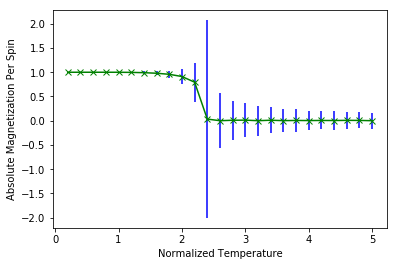

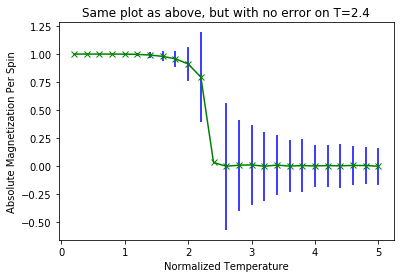

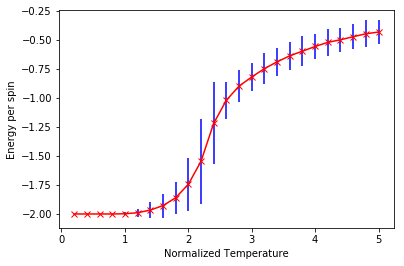

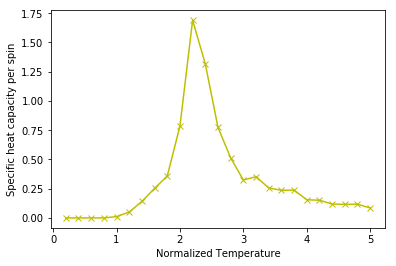

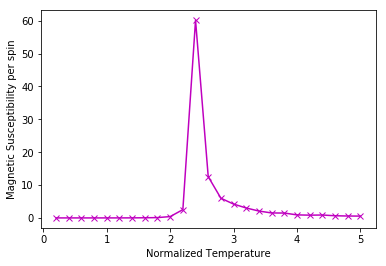

In [36]:
temps=np.linspace(0.2,5,25)

plt.figure()
plt.errorbar(temps,np.abs(mag_array2),fmt='gx-',yerr=m_error2,ecolor='b')
plt.xlabel('Normalized Temperature')
plt.ylabel('Absolute Magnetization Per Spin')
plt.show()

m_error2[11]=0 #plotting another graph with no errorbar for T=2.4 just for clarity in the graph

plt.figure() 
plt.title('Same plot as above, but with no error on T=2.4')
plt.errorbar(temps,np.abs(mag_array2),fmt='gx-',yerr=m_error2,ecolor='b')
plt.xlabel('Normalized Temperature')
plt.ylabel('Absolute Magnetization Per Spin')
plt.show()

plt.figure()
plt.errorbar(temps,E_array2,fmt='rx-',yerr=E_error2,ecolor='b')
plt.xlabel('Normalized Temperature')
plt.ylabel('Energy per spin')
plt.show()

plt.figure()
plt.plot(temps,C_array2,'yx-')
plt.xlabel('Normalized Temperature')
plt.ylabel('Specific heat capacity per spin')
plt.show()

plt.figure()
plt.plot(temps,X_array2,'mx-')
plt.xlabel('Normalized Temperature')
plt.ylabel('Magnetic Susceptibility per spin')
plt.show()

The error for the magnetization blows up near the phase transition due to 'critical slowing down. A graph is plotted just below with this error removed so that the scaling is adjusted for a larger graph, so that the phase transition is clearly visible. 

Errors for the specific heat and suceptibility are not plotted as they are not well defined for a particular Monte Carlo step but are instead averages over a series of MC Sweeps. There is no clear analytical error propagation formula to attain the errors on $C$ (Specific Heat) and $ \chi $ (Susceptibility), and is generally a very arduous process. One possible work around is 'block averaging', where the sampling period is divided into blocks and is averaged at the end of the run. Nevertheless, we will not run a block averaging simulation as our order parameter of interest is primarily the absolute magnetization.

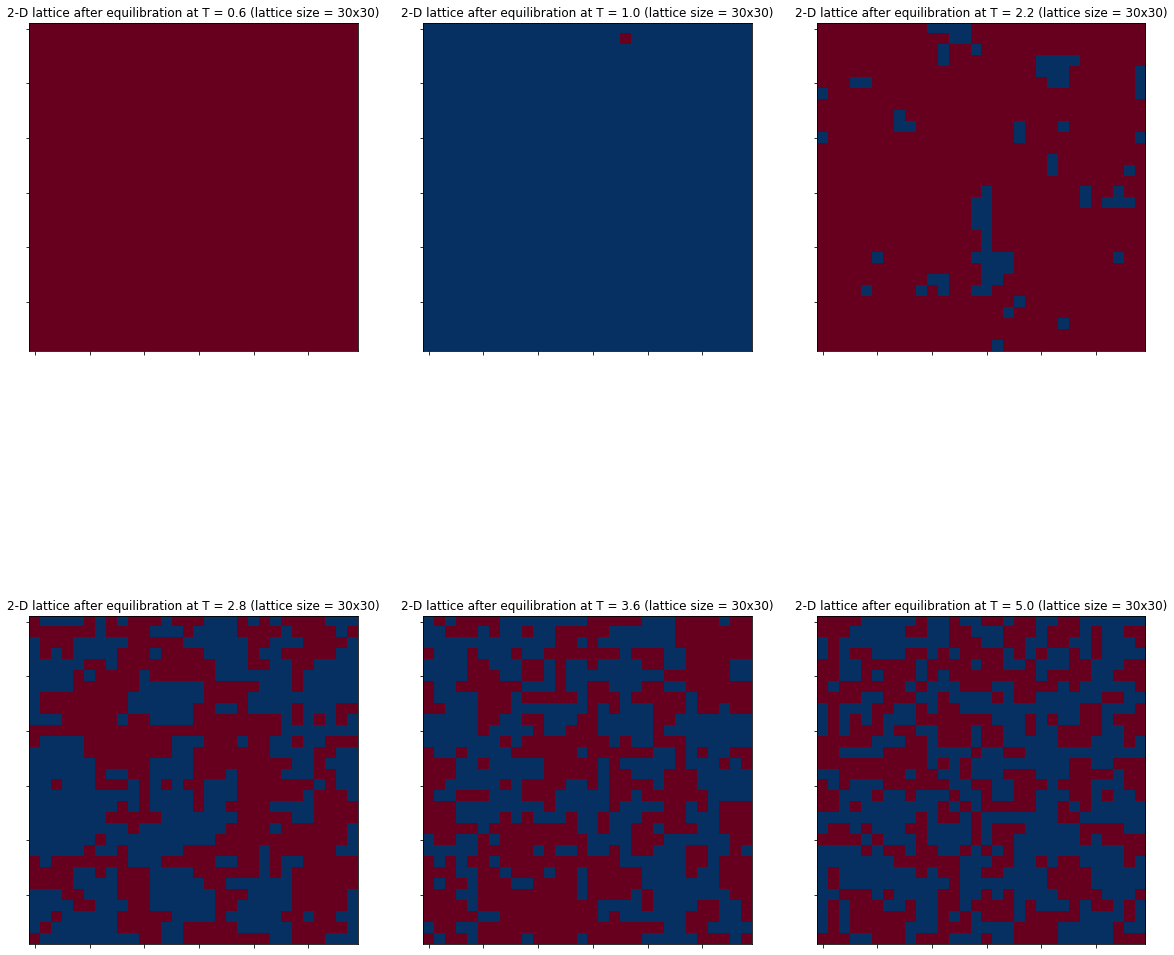

In [49]:
def image_convert_2d(grid): #takes a 2d grid and converts it to be used in imshow
    image_convert_2d = (1 + grid) / 2 * 16
    return image_convert_2d

    #graph the 2-D lattice
fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize = (20,20))

graph = ax1.imshow(image_convert_2d(frames[0]), cmap = plt.cm.RdBu)
   
plt.setp(ax1.get_yticklabels(), visible = False)
plt.setp(ax1.get_xticklabels(), visible = False)
   
ax1.set_title("2-D lattice after equilibration at T = %.1f (lattice size = %.0fx%.0f)" % (0.6, grid_size, grid_size))

graph = ax2.imshow(image_convert_2d(frames[1]), cmap = plt.cm.RdBu)
   
plt.setp(ax2.get_yticklabels(), visible = False)
plt.setp(ax2.get_xticklabels(), visible = False)
   
ax2.set_title("2-D lattice after equilibration at T = %.1f (lattice size = %.0fx%.0f)" % (1.0, grid_size, grid_size))

graph = ax3.imshow(image_convert_2d(frames[2]), cmap = plt.cm.RdBu)
   
plt.setp(ax3.get_yticklabels(), visible = False)
plt.setp(ax3.get_xticklabels(), visible = False)
   
ax3.set_title("2-D lattice after equilibration at T = %.1f (lattice size = %.0fx%.0f)" % (2.2, grid_size, grid_size))

graph = ax4.imshow(image_convert_2d(frames[3]), cmap = plt.cm.RdBu)
   
plt.setp(ax4.get_yticklabels(), visible = False)
plt.setp(ax4.get_xticklabels(), visible = False)
   
ax4.set_title("2-D lattice after equilibration at T = %.1f (lattice size = %.0fx%.0f)" % (2.8, grid_size, grid_size))

graph = ax5.imshow(image_convert_2d(frames[4]), cmap = plt.cm.RdBu)
   
plt.setp(ax5.get_yticklabels(), visible = False)
plt.setp(ax5.get_xticklabels(), visible = False)
   
ax5.set_title("2-D lattice after equilibration at T = %.1f (lattice size = %.0fx%.0f)" % (3.6, grid_size, grid_size))

graph = ax6.imshow(image_convert_2d(frames[5]), cmap = plt.cm.RdBu)
   
plt.setp(ax6.get_yticklabels(), visible = False)
plt.setp(ax6.get_xticklabels(), visible = False)
   
ax6.set_title("2-D lattice after equilibration at T = %.1f (lattice size = %.0fx%.0f)" % (5.0, grid_size, grid_size))
plt.show()

## Ising model with variable applied external magnetic field

In [7]:
J=1 #coupling parameter
#lattice size (Length of side of square)
moment=1

def H(array,field):  #function to compute hamiltonian / energy of the lattice with external magnetic field
    e=-np.sum(J*array*np.roll(array,1,axis=0)+J*array*np.roll(array,-1,axis=0)+J*array*np.roll(array,1,axis=1)+J*array*np.roll(array,-1,axis=1))/2-moment*np.sum(field*array) #divide by 2 to adjust for double counting of spin pairs
    return e

def M(array): #function to calculate magnetization of the lattice
    return np.sum(array)


def delta_E(array,x,y,field): #change in energy caused by single spin switch (only nearest neighbour interactions)
    return 2*J*(array[x,y]*array[(x-1)%grid_size,y]+array[x,y]*array[(x+1)%grid_size,y]+array[x,y]*array[x,(y+1)%grid_size]+array[x,y]*array[x,(y-1)%grid_size])+2*moment*field[x,y]*array[x,y]

def acceptance_probability(array,x,y,T,field): #acceptance ratio (symmetric proposal distribution on markov chain)
    return np.exp(-(delta_E(array,x,y,field))/T)

def monte_carlo(array,T,field): #monte carlo step with metropolis-hastings algorithm
        x_index=np.random.randint(grid_size)
        y_index=np.random.randint(grid_size) #pick a random spin site
        random=np.random.random() #generate random number for acceptance test
        if delta_E(array,x_index,y_index,field)<0: # flip spin and accept new configuration if change in energy is negative
            array[x_index,y_index]*=-1
        elif random<acceptance_probability(array,x_index,y_index,T,field): #or accept with probability in accordance with acceptance criterion
            array[x_index,y_index]*=-1
        return array



In [8]:
temps=np.linspace(0.2,5,25)
h_array=[-2,-1,1,2]
h_mags=[]
h_E=[]
grid_size=16

for h in h_array:
    E_array=[]
    mag_array=[]
    for temp in temps:
        mag=0
        E=0
        grid=np.random.choice([-1,1],size=(grid_size,grid_size))
        for i in range(2000):
            for j in range(grid_size*grid_size):
                monte_carlo(grid,temp,np.full((grid_size,grid_size),h))
        for i in range(2000):
            for j in range(grid_size*grid_size):
                monte_carlo(grid,temp,np.full((grid_size,grid_size),h))
            if i%10==0:
                mag+=M(grid)
                E+=H(grid,np.full((grid_size,grid_size),h))
        mag_array.append(mag/(grid_size*grid_size*200))
        E_array.append(E/(grid_size*grid_size*200))
    h_mags.append(mag_array)
    h_E.append(E_array)      

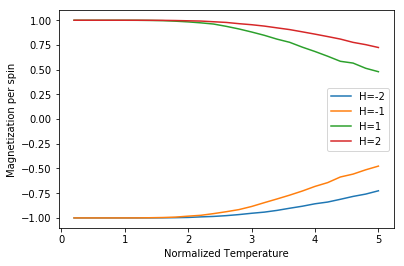

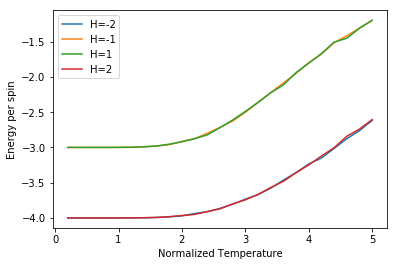

In [11]:
plt.figure()
plt.xlabel('Normalized Temperature')
plt.ylabel('Magnetization per spin')
plt.plot(temps,h_mags[0],temps,h_mags[1],temps,h_mags[2],temps,h_mags[3])
plt.legend(['H=-2','H=-1','H=1','H=2'])
plt.show()

plt.figure()
plt.xlabel('Normalized Temperature')
plt.ylabel('Energy per spin')
plt.plot(temps,h_E[0],temps,h_E[1],temps,h_E[2],temps,h_E[3])
plt.legend(['H=-2','H=-1','H=1','H=2'])
plt.show()

## 2-D Ising Model with Next to Nearest neighbors interactions

We will now investigate the effect of next to nearest neighbors coupling in addition to the standard nearest neighbor couplings on each lattice point.

In [12]:
J1=1 #1st coupling parameter
J2=0.5 #2nd coupling parameter 

def H(array):  #function to compute hamiltonian / energy of the lattice
    e=-np.sum(J1*array*np.roll(array,1,axis=0)+J1*array*np.roll(array,-1,axis=0)+J1*array*np.roll(array,1,axis=1)+J1*array*np.roll(array,-1,axis=1)+
             J2*array*np.roll(array,2,axis=0)+J2*array*np.roll(array,-2,axis=0)+J2*array*np.roll(array,2,axis=1)+J2*array*np.roll(array,-2,axis=1))/4 #divide by 4 to adjust for double counting of spin pairs
    return e

def M(array): #function to calculate magnetization of the lattice
    return np.sum(array)


def delta_E(array,x,y): #change in energy caused by single spin switch (NNN interactions)
    return 2*J*(array[x,y]*array[(x-1)%grid_size,y]+array[x,y]*array[(x+1)%grid_size,y]+array[x,y]*array[x,(y+1)%grid_size]+array[x,y]*array[x,(y-1)%grid_size])+2*J2*(array[x,y]*array[(x-2)%grid_size,y]+array[x,y]*array[(x+2)%grid_size,y]+array[x,y]*array[x,(y+2)%grid_size]+array[x,y]*array[x,(y-2)%grid_size])

def acceptance_probability(array,x,y,T): #acceptance ratio (symmetric proposal distribution on markov chain)
    return np.exp(-(delta_E(array,x,y))/T)

def monte_carlo(array,T): #monte carlo step with metropolis-hastings algorithm
        x_index=np.random.randint(grid_size)
        y_index=np.random.randint(grid_size) #pick a random spin site
        random=np.random.random() #generate random number for acceptance test
        if delta_E(array,x_index,y_index)<0: # flip spin and accept new configuration if change in energy is negative
            array[x_index,y_index]*=-1
        elif random<acceptance_probability(array,x_index,y_index,T): #or accept with probability in accordance with acceptance criterion
            array[x_index,y_index]*=-1
        return array



In [19]:
temps=np.arange(0.6,5,0.2)
E_array=[]
mag_array=[]
grid_size=30
for temp in temps:
        mag=0
        E=0
        grid=np.random.choice([-1,1],size=(grid_size,grid_size))
        for i in range(20000):
            for j in range(grid_size*grid_size):
                monte_carlo(grid,temp)
        for i in range(20000):
            for j in range(grid_size*grid_size):
                eq=monte_carlo(grid,temp)
            if i%25==0:
                mag+=M(eq)
                E+=H(eq)
        mag_array.append(mag/(grid_size*grid_size*800))
        E_array.append(E/(grid_size*grid_size*800))    

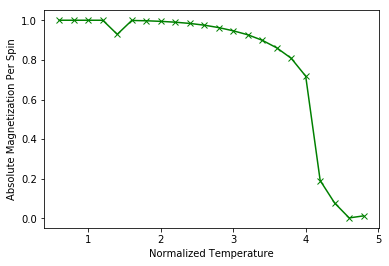

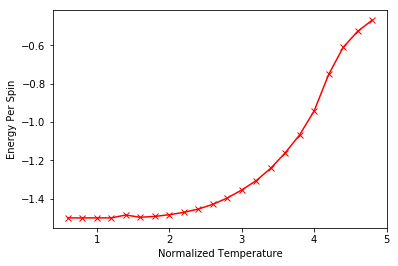

In [21]:
plt.figure()
plt.plot(temps,np.abs(mag_array),'gx-')
plt.xlabel('Normalized Temperature')
plt.ylabel('Absolute Magnetization Per Spin')
plt.show()

plt.figure()
plt.plot(temps,E_array,'rx-')
plt.xlabel('Normalized Temperature')
plt.ylabel('Energy Per Spin')
plt.show()

Notice that the phase transition has shifted to between 4 and 4.2. The kink between T=1 and T=2 is an anomaly.

## Triangular antiferromagnetic lattice
We will use a triangular lattice of the following kind, where each lattice point is 6-coordinated.
![title](triangular_lattice.png)

This is easily translatable into a square lattice with modified neighbor interactions and periodic boundary conditions. We consider the antiferromagnetic case as it is of more physical interest, i.e we hope to see lattice frustrations.

In [28]:
J=-1 #coupling parameter
def H(array):  #function to compute hamiltonian / energy of the triangulat lattice 
    e=-np.sum(J*array*np.roll(array,1,axis=0)+J*array*np.roll(array,-1,axis=0)+J*array*np.roll(array,1,axis=1)+J*array*np.roll(array,-1,axis=1)+
              J*array*np.roll(array,[-1,-1],axis=(0,1))+J*array*np.roll(array,[1,1],axis=(0,1)))/2 #divide by 2 to adjust for double counting of spin pairs
    return e

def M(array): #function to calculate magnetization of the lattice
    return np.sum(array)


def delta_E(array,x,y): #change in energy caused by single spin switch (only nearest neighbour interactions)
    return 2*J*(array[x,y]*array[(x-1)%grid_size,y]+array[x,y]*array[(x+1)%grid_size,y]+array[x,y]*array[x,(y+1)%grid_size]+array[x,y]*array[x,(y-1)%grid_size]+
               array[x,y]*array[(x-1)%grid_size,(y-1)%grid_size]+array[x,y]*array[(x+1)%grid_size,(y+1)%grid_size])

def acceptance_probability(array,x,y,T): #acceptance ratio (symmetric proposal distribution on markov chain)
    return np.exp(-(delta_E(array,x,y))/T)

def monte_carlo(array,T): #monte carlo step with metropolis-hastings algorithm
        x_index=np.random.randint(grid_size)
        y_index=np.random.randint(grid_size) #pick a random spin site
        random=np.random.random() #generate random number for acceptance test
        if delta_E(array,x_index,y_index)<0: # flip spin and accept new configuration if change in energy is negative
            array[x_index,y_index]*=-1
        elif random<acceptance_probability(array,x_index,y_index,T): #or accept with probability in accordance with acceptance criterion
            array[x_index,y_index]*=-1
        return array



In [30]:
E_array=[]
mag_array=[]
X_array=[]
C_array=[]
grid_size=30
for temp in temps:
        mag=0
        E=0
        Esq=0
        grid=np.random.choice([-1,1],size=(grid_size,grid_size))
        for i in range(15000):
            for j in range(grid_size*grid_size):
                monte_carlo(grid,temp)
        for i in range(15000):
            for j in range(grid_size*grid_size):
                monte_carlo(grid,temp)
            if i%25==0:
                mag+=M(grid)
                E+=H(grid)
                magsq=mag*mag
                Esq+=E*E
        X_array.append((magsq/(grid_size*grid_size*600)-(mag*mag)/(grid_size*grid_size*600*600))/temp)
        C_array.append((Esq/(grid_size*grid_size*600)-(E*E)/(grid_size*grid_size*600*600))/temp**2)
        mag_array.append(mag/(grid_size*grid_size*600))
        E_array.append(E/(grid_size*grid_size*600))    
    

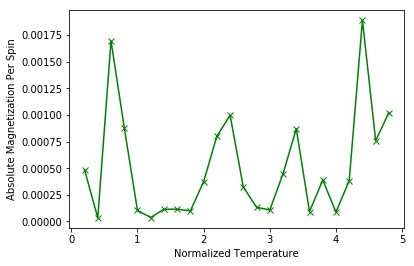

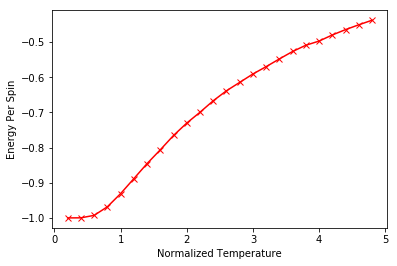

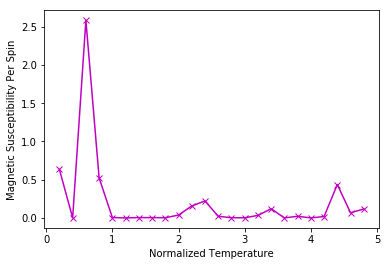

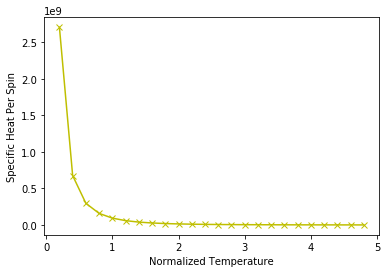

In [33]:
plt.figure()
plt.plot(temps,np.abs(mag_array),'gx-')
plt.xlabel('Normalized Temperature')
plt.ylabel('Absolute Magnetization Per Spin')
plt.show()

plt.figure()
plt.plot(temps,E_array,'rx-')
plt.xlabel('Normalized Temperature')
plt.ylabel('Energy Per Spin')
plt.show()

plt.figure()
plt.plot(temps,X_array,'mx-')
plt.xlabel('Normalized Temperature')
plt.ylabel('Magnetic Susceptibility Per Spin')
plt.show()

plt.figure()
plt.plot(temps,C_array,'yx-')
plt.xlabel('Normalized Temperature')
plt.ylabel('Specific Heat Per Spin')
plt.show()

## Visualizing the Triangular Lattice
This is the function used to generate the animations of the triangular antiferromagnetic lattice that were displayed at the project presentation.

In [ ]:
#Animations were run in an IDE (Spyder), this cell has been 
#added to give an example of how the animations were rendered

import numpy as np
import matplotlib.pyplot as plt
 
import matplotlib.animation as animation
 
J=-1 #coupling parameter
def H(array):  #function to compute hamiltonian / energy of the lattice
    e=-np.sum(J*array*np.roll(array,1,axis=0)+J*array*np.roll(array,-1,axis=0)+J*array*np.roll(array,1,axis=1)+J*array*np.roll(array,-1,axis=1)+
              J*array*np.roll(array,[-1,-1],axis=(0,1))+J*array*np.roll(array,[1,1],axis=(0,1)))/2 #divide by 2 to adjust for double counting of spin pairs
    return e
 
def M(array): #function to calculate magnetization of the lattice
    return np.sum(array)
 
def delta_E(array,x,y): #change in energy caused by single spin switch (only nearest neighbour interactions)
    return 2*J*(array[x,y]*array[(x-1)%grid_size,y]+array[x,y]*array[(x+1)%grid_size,y]+array[x,y]*array[x,(y+1)%grid_size]+array[x,y]*array[x,(y-1)%grid_size]+
               array[x,y]*array[(x-1)%grid_size,(y-1)%grid_size]+array[x,y]*array[(x+1)%grid_size,(y+1)%grid_size])
 
def acceptance_probability(array,x,y,T): #acceptance ratio (symmetric proposal distribution on markov chain)
    return np.exp(-(delta_E(array,x,y))/T)
 
def monte_carlo(array,T): #monte carlo step with metropolis-hastings algorithm
        x_index=np.random.randint(grid_size)
        y_index=np.random.randint(grid_size) #pick a random spin site
        random=np.random.random() #generate random number for acceptance test
        if delta_E(array,x_index,y_index)<0: # flip spin and accept new configuration if change in energy is negative
            array[x_index,y_index]*=-1
        elif random<acceptance_probability(array,x_index,y_index,T): #or accept with probability in accordance with acceptance criterion
            array[x_index,y_index]*=-1
        return array
   
 
def shear_entire(grid):
   
    '''
   Function that takes the grid for the triangular lattice and horizontally
   shears it by 30° in order to better represent the coupling between spin
   sites. Returns lists corresponding to coordinates of sheared points
   divided by whether the site at that point has a positive or negative spin.
   '''
   
    pos = []
    neg = []
   
    def shear(coord, k=0.5):
        return tuple([coord[0]+k*coord[1], coord[1]])
 
    for y in range(len(grid)):
        for x in range(len(grid[y])):
            if grid[y][x] == 1:
                pos.append([x, y])
            else:
                neg.append([x, y])
   
    pos = [shear(x) for x in pos]
    neg = [shear(x) for x in neg]
   
    pos_x = []
    pos_y = []
    neg_x = []
    neg_y = []
   
    for coord in pos:
        pos_x.append(coord[0])
        pos_y.append(coord[1])
 
    for coord in neg:
        neg_x.append(coord[0])
        neg_y.append(coord[1])
       
    return pos_x, pos_y, neg_x, neg_y
 
###############################################################################
 
#set parameters
temp = 2 #set temperatrue (beta factor)
multiplier = 60 #number of MC steps per frame
 
grid_size = 30 #set grid size
grid = np.random.choice([-1, 1], size=(grid_size, grid_size)) #initialize lattice
 
pos_x, pos_y, neg_x, neg_y = shear_entire(grid)
 
frames = []
 
for i in range(9000): #burn-in phase
    for j in range(grid_size * grid_size):
        monte_carlo(grid, temp)
    if i % multiplier == 0:
        pos_x, pos_y, neg_x, neg_y = shear_entire(grid)
        frames.append([pos_x, pos_y, neg_x, neg_y])
    
for i in range(3000): #equilibrium?
    for j in range(grid_size * grid_size):
        monte_carlo(grid, temp)
    if i % multiplier == 0:
        pos_x, pos_y, neg_x, neg_y = shear_entire(grid)
        frames.append([pos_x, pos_y, neg_x, neg_y])
 

 
#intitialize plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
graph1 = ax.scatter(frames[0][0], frames[0][1], s = 125, marker = 'o', c = 'r', edgecolor = 'black')
graph2 = ax.scatter(frames[0][2], frames[0][3], s = 125, marker = 'o', c = 'b', edgecolor = 'black')
 
#hide ticks on axes
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
 
plt.title("Triangular lattice evolition at T = %.1f (lattice size = %.0fx%.0f)" % (temp, grid_size, grid_size))
time_text = ax.text(0.025, 0.95, "MC Steps: 0", transform = ax.transAxes, fontsize = 25, color = "black")
 
plt.show()
 
###############################################################################
 
#set mp4 rendering parameters
number_frames = len(frames) #set number of frames for mp4 generation
duration = 10
fps = number_frames / duration
 
def update_graph(num, frames, graph1, graph2):
    #update graphs
    graph1 = ax.scatter(frames[num][0], frames[num][1], s = 125, marker = 'o', c = 'r', edgecolor = 'black')
    graph2 = ax.scatter(frames[num][2], frames[num][3], s = 125, marker = 'o', c = 'b', edgecolor = 'black')
    time_text.set_text("MC Steps: %.0f" % int(num * multiplier))
    return graph1, graph2
 
#setup a writer using ffmpeg
Writer = animation.writers["ffmpeg"]
writer = Writer(fps = fps, metadata = dict(artists = "Me"), bitrate = -1)
 
#save an mp4 render of system evolution
graph_ani = animation.FuncAnimation(fig, update_graph, frames = number_frames, fargs = (frames, graph1, graph2))
graph_ani.save("Triangular lattice evolution at T = %.1f(lattice size = %.0fx%.0f).mp4" % (temp, grid_size, grid_size), writer = writer)